In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D 

In [54]:
##give path for the data set
df = pd.read_csv("Mall_Customers.csv")

In [23]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [25]:
df.shape

(200, 5)

In [55]:
#checking for null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the Annual Income Column & Spending Score column

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [56]:
#removing null values (if present)
df.dropna(inplace=True)

In [57]:
if "Gender" in df.columns:
    df = pd.get_dummies(df, columns=["Gender"], drop_first=True)

In [58]:
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False
...,...,...,...,...,...
195,196,35,120,79,False
196,197,45,126,28,False
197,198,32,126,74,True
198,199,32,137,18,True


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
 4   Gender_Female           200 non-null    bool 
 5   Gender_Male             200 non-null    bool 
dtypes: bool(2), int64(4)
memory usage: 6.8 KB


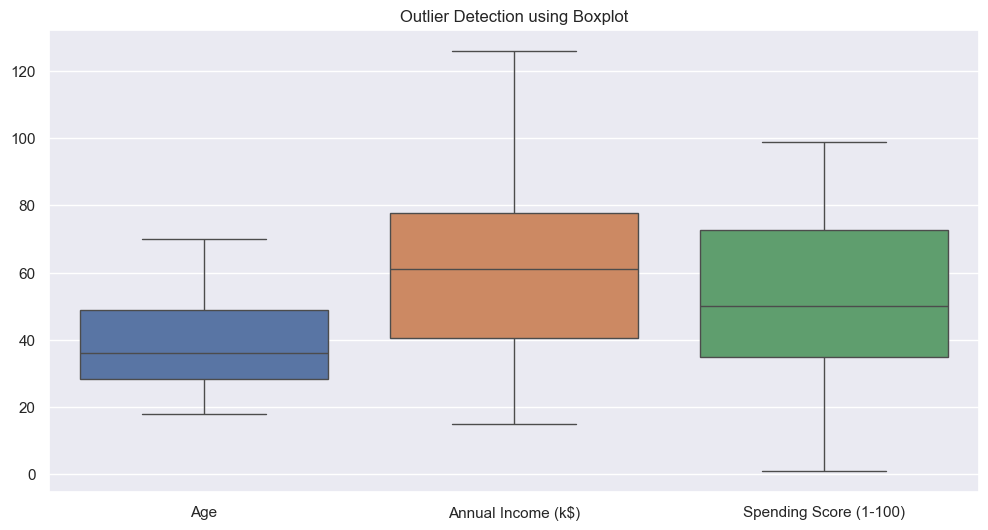

In [61]:
#checking for outliers
features = df.columns[1:4]
plt.figure(figsize=(12,6))
sns.boxplot(data=df[features])
plt.title("Outlier Detection using Boxplot")
plt.show()

In [60]:
#removing outliers (if present)
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25) 
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return df[(df[col]>=lower) & (df[col]<=upper)]


for col in features:
    df = remove_outliers(df, col)

In [62]:
X = df.iloc[:,1:6].values
X

array([[19, 15, 39, True],
       [21, 15, 81, True],
       [20, 16, 6, False],
       [23, 16, 77, False],
       [31, 17, 40, False],
       [22, 17, 76, False],
       [35, 18, 6, False],
       [23, 18, 94, False],
       [64, 19, 3, True],
       [30, 19, 72, False],
       [67, 19, 14, True],
       [35, 19, 99, False],
       [58, 20, 15, False],
       [24, 20, 77, False],
       [37, 20, 13, True],
       [22, 20, 79, True],
       [35, 21, 35, False],
       [20, 21, 66, True],
       [52, 23, 29, True],
       [35, 23, 98, False],
       [35, 24, 35, True],
       [25, 24, 73, True],
       [46, 25, 5, False],
       [31, 25, 73, True],
       [54, 28, 14, False],
       [29, 28, 82, True],
       [45, 28, 32, False],
       [35, 28, 61, True],
       [40, 29, 31, False],
       [23, 29, 87, False],
       [60, 30, 4, True],
       [21, 30, 73, False],
       [53, 33, 4, True],
       [18, 33, 92, True],
       [49, 33, 14, False],
       [21, 33, 81, False],
       [42, 34

In [63]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [64]:
print(X_scaled)

[[-1.42541358 -1.77917141 -0.43598941  1.1411948 ]
 [-1.2823665  -1.77917141  1.19941337  1.1411948 ]
 [-1.35389004 -1.73944701 -1.72094874 -0.87627458]
 [-1.13931942 -1.73944701  1.04366072 -0.87627458]
 [-0.5671311  -1.69972262 -0.39705125 -0.87627458]
 [-1.21084296 -1.69972262  1.00472256 -0.87627458]
 [-0.28103694 -1.65999822 -1.72094874 -0.87627458]
 [-1.13931942 -1.65999822  1.70560947 -0.87627458]
 [ 1.79314572 -1.62027383 -1.83776323  1.1411948 ]
 [-0.63865464 -1.62027383  0.84896992 -0.87627458]
 [ 2.00771635 -1.62027383 -1.40944345  1.1411948 ]
 [-0.28103694 -1.62027383  1.90030028 -0.87627458]
 [ 1.36400448 -1.58054943 -1.37050529 -0.87627458]
 [-1.06779588 -1.58054943  1.04366072 -0.87627458]
 [-0.13798986 -1.58054943 -1.44838161  1.1411948 ]
 [-1.21084296 -1.58054943  1.12153705  1.1411948 ]
 [-0.28103694 -1.54082504 -0.59174206 -0.87627458]
 [-1.35389004 -1.54082504  0.61534095  1.1411948 ]
 [ 0.93486324 -1.46137625 -0.82537103  1.1411948 ]
 [-0.28103694 -1.46137625  1.86

Choosing the number of clusters

WCSS -> Within Clusters Sum of Squares

In [65]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', n_init ="auto", random_state=42)
  kmeans.fit(X_scaled)

  wcss.append(kmeans.inertia_)

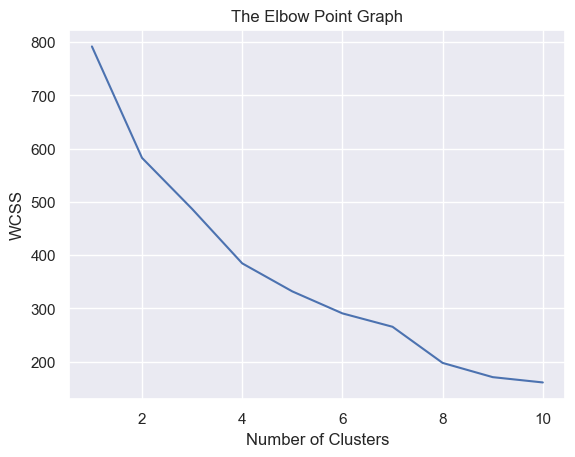

In [66]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [71]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init = "auto", random_state=42)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X_scaled)
df["Cluster"] = Y

print(Y)

[2 2 2 2 2 2 3 2 0 2 0 2 3 2 0 2 3 2 0 2 2 2 3 2 3 2 3 2 3 2 0 2 0 2 3 2 3
 2 3 2 3 2 0 2 3 2 3 2 2 2 3 2 2 0 3 0 3 0 2 0 0 2 3 3 0 2 3 3 2 3 0 3 3 3
 0 2 3 0 2 3 0 0 0 3 2 0 3 2 3 3 3 2 0 3 3 2 3 2 0 2 2 3 0 2 0 2 3 0 0 0 0
 2 3 2 2 2 3 3 3 3 2 3 3 1 3 1 4 1 0 1 4 1 3 1 4 1 3 1 4 1 3 1 3 1 4 1 4 1
 3 1 4 1 3 1 3 1 4 1 4 1 3 1 4 1 4 1 4 1 3 1 4 1 4 1 3 1 4 1 4 1 4 1 4 1 3
 1 3 1 4 1 4 1 4 1 4 1 4 1]


5 Clusters - 0, 1, 2, 3, 4

Visualizing all the Clusters

In [72]:
sil = silhouette_score(X_scaled, Y)
print(f"\nSilhouette Score (K={optimal_k}): {sil:.3f}")


Silhouette Score (K=5): 0.305


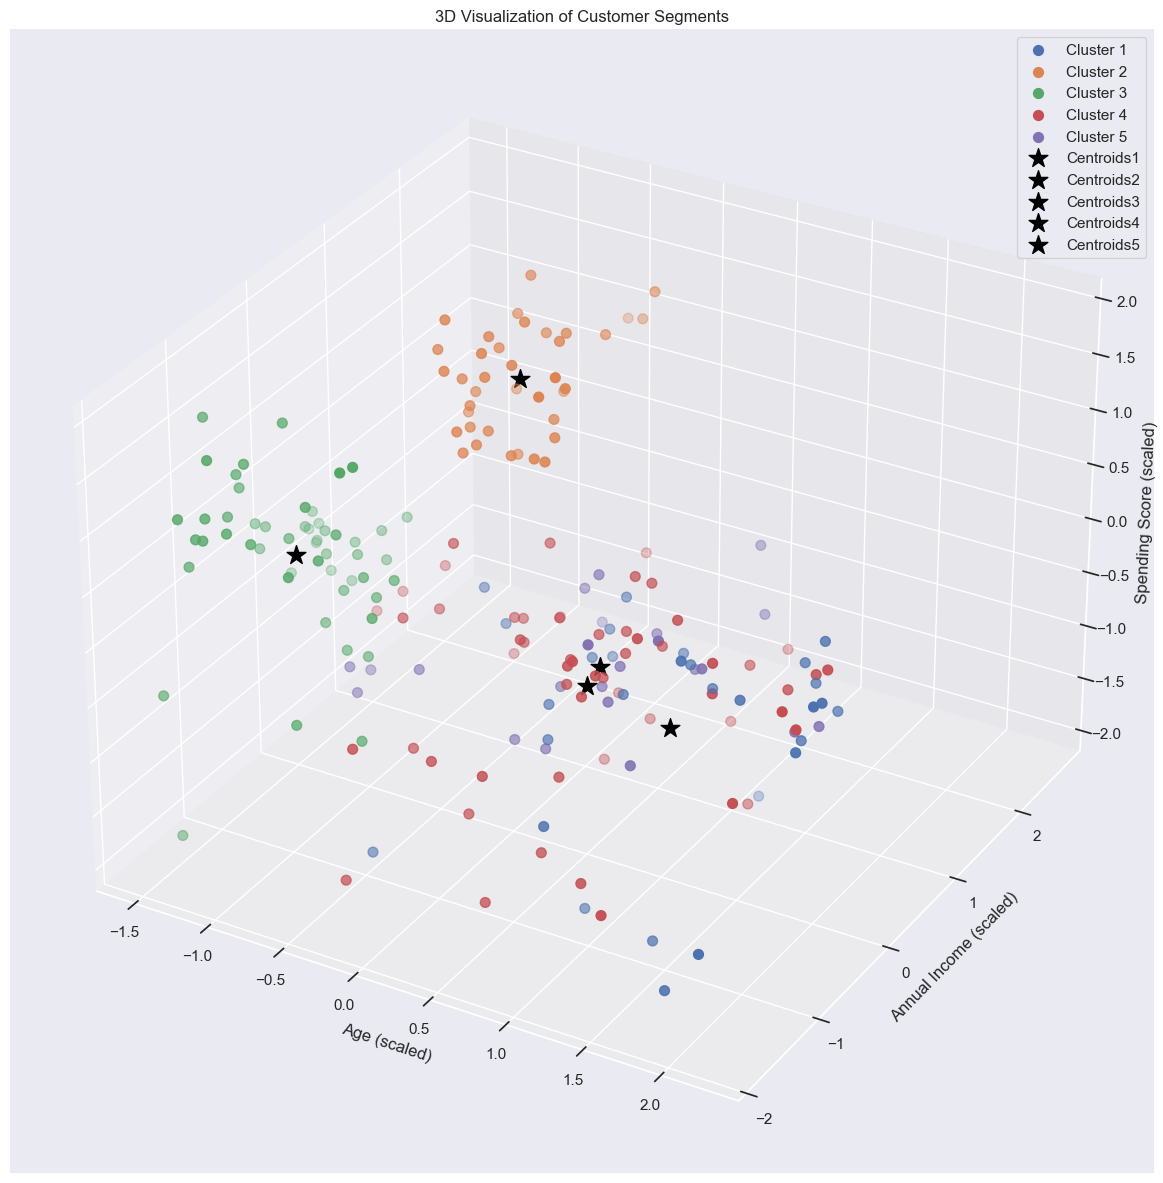

In [82]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection="3d")

# Plot each cluster
for c in range(optimal_k):
    ax.scatter(
        X_scaled[Y == c, 0],
        X_scaled[Y == c, 1],
        X_scaled[Y == c, 2],
        s=50,
        label=f"Cluster {c+1}",
    )

# Plot centroids
centers = kmeans.cluster_centers_
for i in range(len(centers)):
    ax.scatter(centers[i,0], centers[i,1], centers[i,2], s=200,c='black', marker="*", label=f"Centroids{i+1}")

ax.set_title("3D Visualization of Customer Segments")
ax.set_xlabel("Age (scaled)")
ax.set_ylabel("Annual Income (scaled)")
ax.set_zlabel("Spending Score (scaled)")
ax.legend()
plt.tight_layout()
plt.show()


In [74]:
centers

array([[ 1.27275031, -0.46552675, -0.40779281,  1.1411948 ],
       [-0.44102381,  1.0098993 ,  1.24245028,  0.02627751],
       [-1.02515685, -0.81738268,  0.44011922, -0.02272984],
       [ 0.58235437, -0.15969293, -0.49370133, -0.87627458],
       [ 0.02371553,  1.15525241, -1.33156713,  0.7026145 ]])

In [77]:
centers.shape

(5, 4)

In [85]:
# Cluster Summary
print("\nCluster-wise averages:")
cluster_summary = df.groupby("Cluster")[features].mean().round(2)
print(cluster_summary)
cluster_labels = {
    0: "General Shoppers",                  #Mid income, moderate spenders
    1: "Premium Customers",                 #High income, high spenders
    2: "Potential Growth",                  #Low income, high spenders
    3: "Budget Consious customers",         #Mid income, low spenders
    4: "Upsell Targets"                     #High income, low spenders
}
df["Segment"] = df["Cluster"].map(cluster_labels)
df.head()


Cluster-wise averages:
           Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                   
0        56.72               48.07                   39.72
1        32.76               85.21                   82.11
2        24.60               39.21                   61.50
3        47.07               55.77                   37.52
4        39.26               88.87                   16.00


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster,Segment
0,1,19,15,39,True,2,Potential Growth
1,2,21,15,81,True,2,Potential Growth
2,3,20,16,6,False,2,Potential Growth
3,4,23,16,77,False,2,Potential Growth
4,5,31,17,40,False,2,Potential Growth
